## Dictionary (again)
<strong>Recall</strong>: dictionaries are a convenient way to store data for later retrieval by key. Keys must be unique, immutable objects; the values can be anything.

In [1]:
seq = 'TAGGATTACAGGCATGAGCTACCGTATAATGGCCAGGCCCCCTGCCTTTGTAAATAAATTTTCACTGGAACCTGGACACACTTGTTTATGTGTTGTTTGTGCCTGTTTTCACGCTGCGGCAGGAAAGTTGAGTCGTTGTGTCAGAGACCAGAGAGAGAGCCTGCAGAACCTCAAATACTATCTGGCCCTTGCCAGAAAAAGTTTACCAACCCCCTGCCTCCCTGGAATGGGTGGAGGGTGGTTGTAAAGGTACTGGAGGATCTGAAGACATAATAGGGTCCGTGACCCTTGTGAGGTTGTGAAGCTCCCTTAAGGCACATGGTGGCTGGGCTGTGGATTTGGGGTATGGGCAGAGAGTGTGGAGAGCACTTCCAGGGGCCATGTCTGAGAGACTACATGATGCCACTTTGAATGCCCAGTTTGTTCATCCTTTTCTGTTTTCCCCACTTCCCCAGATGGGTGATCTACAATGACCAGAAAGTGTGTGCCTCCGAGAAGCCGCCCAAGGATATAATACATCTACTTCTACCAGAGAGTGGCCAGCTAAGAGCCTGCCTCACCCCTTACCAATGAGGGCAGGGGAAGACCACCTGGCATGAGGGAGAGGGGCTGAGGGATGGACTTCAGCCCCTCTGCTCTGTACCCTTTTTCCTTTTGTCCCCGGCAGCAGGGAAGAAGCTGGAGGCCGTGGGAGAATGGCTGGGCAGAGCAGAGGGGCAGCGATAGACTCTGGGGATGGAGCAGGACGGGGACGGGAGGGGCCGGCCACCTGTCTGTAAGGAGACTTTGTTGCTTCCCCTGCCCCCGGAATCCACAGTGCTCTGCTTCTCTGTGTCGCCCCGCCCAGCCCCCTGGTGTGGAGGGAGGGGTCTCGTTTGTGCGCGTGGGTGTAGCTTTGTGCATCCTCTCCCAGTGGAGCGATCACCTGTGCCTCCCCTCCCCCTTTGTTTGCCCCTGTGTGGTTGGTCAAGGAGGGATGTGAGGGAAATAGGGACCCCCCGACTTGCCCTCCTGCCTCAGTCTTTCCCCCACCCTGTCTCTTCCTTGTCCTTCTCTGGAAAATGCCAAAATACACGATGTGAATAAAAGTACAACGGCTAAATTGTGTCCTGTTTGATACCTTGGGGGAGAGGCTTACCTTCCTGGGGTTAGCAGGAGGGCGCTTAAGAAAACTCCTAACTCTGGCCGCCTCCCTGCCAAAGTCAAGTCTCCACTTTTCACTGGTTCTAGAGCTCTAGGAAAATTGGGGTTGGGTGGGGAGGTGGAGTAGAGTGACTAAATGCCGACACAAAGCCAAGGAAAGATGGAGTGAAGAACCCTTCCCTCTCTTTATTCACACAGGAGTGGAGGATTTCCCAAATGTCCCTAACTGGCTAGCTGGCTTCAGGCTGGGACTCAGTCCCTGCAGTTCCTGCCAGGCCTTGCCAGCCGGGGCGAGGGTTGGGATGATCCTGGCGGCCTATGCCTTATAATGCTGCCCCTCCCGCTGTGAACCCTGCATTTGTCCCGCAAGTTTTCACTCAGGTAGACTCCCTGGGTACAAGGGTGCCTGCTCAGCAGTCGGGCATGAGCTGCTCCGATGGGCGAAGGAGGTTGTCTATCCCACAGTTGGAGAGGGGCCCTCTCTGCCCCAGTGGGCGATCTGGGCTACGGCCAAGTTGCCACCAGCTAGTTCCGCTTGAAAACCACTTCTGGCCCCGTGGGGGACTCAAGTCGCCAAGCGAGGGTTCCCCTGAGCGCCGGAGCTCACAGGTCTCGCCTTGTCCCGAAAGCCCCGCAATCGAGGCGGAGGCGACCGAGCCCCCGACTCTCCTAGAACGTTGCCACAAGAAGGGGGAACGTCGGAACAGTGCATCATCGGGCGGCGGCCGGGGCGGCGGCAGGAGGGCGGGCGGGGGGCAGGGCTCCGGGGGACTGGGCGGGCCATGGCGGAGGACGGCGAGGAGGCGGAGTTCCACTTCGCGGCGCTCTATATAAGTGGGCAGTGGCCGCGACTGCGCGCAGACACTGACCTTCAGCGCCTCGGCTCCAGCGCCATGGCGCCCTCCAGGAAGTTCTTCGTTGGGGGAAACTGGAAGATGAACGGGCGGAAGCAGAGTCTGGGGGAGCTCATCGGCACTCTGAACGCGGCCAAGGTGCCGGCCGACACCG'

consensus_motifs = {
    'Shine_Dalgarno': 'AGGAGG',
    'TATA_BOX': 'TATAAT',
    'CAT_BOX': 'GGGCGG',
    'FAKE_BOX_1': 'ATGGAAGGCA',
    'FAKE_BOX_2': 'TTTTA'
}

### Slicing operation
The slicing operation allows us to extract a contiguous piece of a string or list.

In [2]:
example = '0123456'

print('example[0]', example[0]) # Indexing

print('\nexample[2:5]', example[2:5])

print('\nexample[0:2]', example[0:2])
print('example[:2]', example[:2])

print('\nexample[2:len(example)]', example[1:len(example)])
print('example[2:]', example[1:len(example)])

example[0] 0

example[2:5] 234

example[0:2] 01
example[:2] 01

example[2:len(example)] 123456
example[2:] 123456


In [3]:
def find_motifs_v1(sequence, motif_list):
    motifs_dict = {}
    
    for motif in motif_list:
        motif_len = len(motif)

        for pos in range(len(sequence) - motif_len):
            # Returns a slice of the string, starting at index pos,
            # and going up to, but not including, index pos+motif_len.
            kmer = sequence[pos:pos+motif_len]
            
            if motif == kmer:
                if motif not in motifs_dict.keys():
                    motifs_dict[motif] = set()
                motifs_dict[motif].add(pos)

    return motifs_dict

find_motifs_v1(seq, consensus_motifs.values())

{'AGGAGG': {969, 1153, 1587, 1881, 1941},
 'TATAAT': {24, 509, 1467},
 'GGGCGG': {1859, 1871, 1885, 1889, 1916, 2084}}

In [4]:
def find_motifs_v2(sequence, motif_list):
    motifs_dict = {}
    
    for motif in motif_list:
        if motif in seq:
            motif_len = len(motif)

            for pos in range(len(sequence) - motif_len + 1):
                kmer = sequence[pos:pos+motif_len]
                if motif == kmer:
                    if motif not in motifs_dict.keys():
                        motifs_dict[motif] = set()
                    motifs_dict[motif].add(pos)

    return motifs_dict

%timeit find_motifs_v1(seq, consensus_motifs.values())
%timeit find_motifs_v2(seq, consensus_motifs.values())

1.63 ms ± 78.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
944 µs ± 8.72 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


A Python dictionary throws a KeyError if you try to get an item with a key that is not currently in the dictionary.

In [5]:
motifs_dict = {}

#motifs_dict['TATAAT'].add(3)

The <code>defaultdict</code> allows to specify the default value when the container is initialized.

In [6]:
from collections import defaultdict

def find_motifs_v3(sequence, motif_list):
    motifs_dict = defaultdict(set)
    
    for motif in motif_list:
        if motif in seq:
            motif_len = len(motif)

            for pos in range(len(sequence) - motif_len + 1):
                kmer = sequence[pos:pos+motif_len]
                if motif == kmer:
                    # Now it's useless
                    #if motif not in motifs_dict.keys():
                    #    motifs_dict[motif] = set()
                    motifs_dict[motif].add(pos)

    return motifs_dict

find_motifs_v3(seq, consensus_motifs.values())

defaultdict(set,
            {'AGGAGG': {969, 1153, 1587, 1881, 1941},
             'TATAAT': {24, 509, 1467},
             'GGGCGG': {1859, 1871, 1885, 1889, 1916, 2084}})

## Numpy (from <a href="https://github.com/noise42/datastructures/blob/master/materials/python-data-science-handbook.pdf">here</a> and <a href="https://python4bioinformaticsblog.wordpress.com/index/python-bits/numpy/">here</a>)
[NumPy](https://numpy.org/) (short for *Numerical Python*) is a numerical library for Python which provides an efficient interface to store and operate on data.

While a statically-typed language like C requires each variable to be explicitly declared, a dynamically-typed language like Python skips this specification (in Python the types are dynamically inferred).

### A Python Integer Is More Than Just an Integer
The standard Python implementation is written in C. This means that every Python object is simply a C structure, which contains not only its value, but other information as well. For example, a Python integer is a pointer to a position in memory containing all the Python object information, including the bytes that contain the integer value.

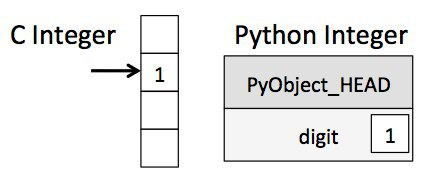

This extra information in the Python integer structure is what allows Python to be coded so freely and dynamically.

### A Python List Is More Than Just a List
Because of Python's dynamic typing, we can create heterogeneous lists:

In [7]:
my_list = [True, "2", 3.0, 4]
#how do I create a mirror list with types referring to the original?
[type(item) for item in my_list]

[bool, str, float, int]

But this flexibility comes at a <strong>cost</strong>: to allow these flexible types, each item in the list must contain its own type info, reference count, and other information, that is, each item is a complete Python object.

At the implementation level, the array essentially contains a single pointer to one contiguous block of data. The Python list, on the other hand, contains a pointer to a block of pointers, each of which in turn points to a full Python object. In the special case that all variables are of the <strong>same type</strong>, much of this information is redundant: it can be much more efficient to store data in a <strong>fixed-type</strong> array.



### Fixed-Type Arrays in Python
The built-in ``array`` module can be used to create arrays of a uniform type:

In [8]:
import array

L = list(range(10))
A = array.array('i', L) # i: indicates integer values
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Much more useful, however, is the ``numpy.ndarray`` object of the NumPy package which adds to this efficient *operations* on that data.

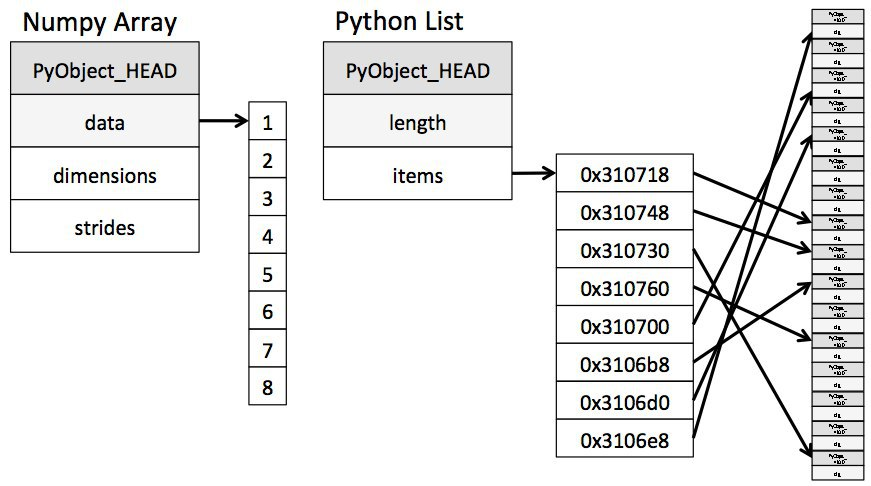

In [9]:
import numpy as np

x_np = np.random.randint(10, size=9)  # One-dimensional array

type(x_np), x_np

(numpy.ndarray, array([9, 2, 0, 5, 3, 3, 0, 7, 2]))

We can "mentally map" Numpy arrays to standard python lists, for they have similarities:

In [10]:
print('x1[3]:', x_np[3])     # Array Indexing
print('x1[2:5]:', x_np[2:5]) # Array Slicing

# Iteration
for element in x_np:
    print(element)

x1[3]: 5
x1[2:5]: [0 5 3]
9
2
0
5
3
3
0
7
2


``numpy.ndarray`` stands for <strong>N-dimensional array</strong> which means that this object is built to be multi-dimensional, with attributes and methods specifically designed for this feature. For example, if you want to put the values in the ``x_np`` array in a 3x3 grid, you can use the ``reshape`` method.

In [11]:
grid = x_np.reshape((3, 3))  # Two-dimensional array

print("grid.ndim: ", grid.ndim)
print("grid.shape:", grid.shape)
print("grid.size: ", grid.size)
print("grid.dtype:", grid.dtype)

print(x_np)
print(grid)

grid.ndim:  2
grid.shape: (3, 3)
grid.size:  9
grid.dtype: int64
[9 2 0 5 3 3 0 7 2]
[[9 2 0]
 [5 3 3]
 [0 7 2]]


Note that for this to work, the size of the initial array must match the size of the reshaped array.

### Vectorized Operations
Operation between arrays are carried out with a different logic than that of standard lists. For example, the operator ``+`` on lists concatenates two lists, while if applied to two ``ndarray``s they get summed in an element-wise fashion.

In [12]:
x_list = list(x_np)

print('x_list + x_list:', x_list + x_list)
print('x_np + x_np:', x_np + x_np)

x_list + x_list: [9, 2, 0, 5, 3, 3, 0, 7, 2, 9, 2, 0, 5, 3, 3, 0, 7, 2]
x_np + x_np: [18  4  0 10  6  6  0 14  4]


Actually, each arithmetic operator is simply a convenient wrapper around specific functions built into NumPy:

| Operator	    | Equivalent func     | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|

Python's default implementation does some operations very slowly. In a loop, for each iteration Python first examines the object's type and does a dynamic lookup of the correct function to use for that type. If we were working in compiled code instead, this type specification would be known before the code executes and the result could be computed much more efficiently. Numpy provides a way to do this through the <strong>vectorized operations</strong>.

In [13]:
big_array = np.random.rand(10000000)

%timeit sum(big_array)
%timeit np.sum(big_array) # or big_array.sum()

1.89 s ± 32.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.74 ms ± 9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Note that the ``sum`` function and the ``np.sum`` function are not identical! In particular, their optional arguments have different meanings, and ``np.sum`` is aware of multiple array dimensions.

<strong>Important</strong>: whenever possible, make sure that you are using the NumPy version of these operations when operating on NumPy arrays.

### Boolean indexing
Numpy arrays can be sliced with vectors of booleans (``list``s or other ``ndarray``s) with the same dimensions.

A boolean vector is usually created starting from the ``ndarray`` itself by applying a condition.

In [14]:
boolean_np = x_np > 3

print('x_np:', x_np)
print('boolean_np:', boolean_np) # It states if the element in the elements in the same position are > 3.

print(x_np[boolean_np])
print(x_np[x_np > 3])

%timeit [x for x in big_array if x > 3]
%timeit big_array[big_array > 3]

x_np: [9 2 0 5 3 3 0 7 2]
boolean_np: [ True False False  True False False False  True False]
[9 5 7]
[9 5 7]
3.23 s ± 98.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.45 ms ± 675 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Pandas  (from <a href="https://github.com/noise42/datastructures/blob/master/materials/python-data-science-handbook.pdf">here</a> and <a href="http://bioinformationx.com/index.php/index/python-bits/pandas/">here</a>)

[Pandas](https://pandas.pydata.org/) is a package built on top of NumPy, and provides an efficient implementation of a ``DataFrame``. ``DataFrame``s are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data.

### The Pandas Series Object
A Pandas ``Series`` is a one-dimensional array of indexed data. It can be created from a list or array as follows:

In [2]:
import pandas as pd

data = pd.Series(['RNA', 'gene', 'protein'])
data

0        RNA
1       gene
2    protein
dtype: object

The ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the ``values`` and ``index`` attributes. The ``values`` are simply a NumPy array, while the ``index`` is an array-like object of type ``pd.Index``. Note that the index needs not be an integer, but can consist of values of any desired type:

In [3]:
data = pd.Series(
    ['RNA', 'gene', 'protein'],
    index=['ENST', 'ENSG', 'ENSP']
)
data

ENST        RNA
ENSG       gene
ENSP    protein
dtype: object

The last part, the `dtype`, is not part of the elements you access when cycling through the values of the ``Series``, it is just another attribute.

We can construct a ``Series`` from a dictionary and the way we access the values are similar to dictionaries:

In [17]:
map_dict = {'ENST': 'RNA', 'ENSG': 'gene', 'ENSP': 'protein'}
data = pd.Series(map_dict)

data['ENSG']

'gene'

``Series`` support slicing just like other arrays:

In [18]:
data['ENSG':]

ENSG       gene
ENSP    protein
dtype: object

### The Pandas DataFrame Object
The ``DataFrame`` can be thought as a generalization of a mix of both a NumPy array and a dictionary. It can be constructed from 2 or more dictionary with the same keys (or from 2 ``Series`` with the same indexes).

In [19]:
count_dict = {'ENST': 3300, 'ENSG':18435, 'ENSP': 12034}
 
df = pd.DataFrame({'mapping type': map_dict, 'counts': count_dict})
df

,mapping type,counts
ENST,RNA,3300
ENSG,gene,18435
ENSP,protein,12034


We can access the index labels with the ``DataFrame`` attribute ``index``. Additionally, the ``DataFrame`` has a ``columns`` attribute, which holds the labels for all columns.

In [20]:
df.index, df.columns

(Index(['ENST', 'ENSG', 'ENSP'], dtype='object'),
 Index(['mapping type', 'counts'], dtype='object'))

We can access a colum like a dictionary or in a Pandas way:

In [21]:
df['counts']  # like a dictionary

ENST     3300
ENSG    18435
ENSP    12034
Name: counts, dtype: int64

In [22]:
df.counts  # The Pandas way

ENST     3300
ENSG    18435
ENSP    12034
Name: counts, dtype: int64

The only difference is that the dictionary way supports labels with spaces and special characters:

In [23]:
df['mapping type']
#df.mapping type  # I can't do it

ENST        RNA
ENSG       gene
ENSP    protein
Name: mapping type, dtype: object

### Indexers: loc, iloc
Pandas provides some special *indexer* attributes that explicitly expose certain indexing/slicing schemes.

ToDo